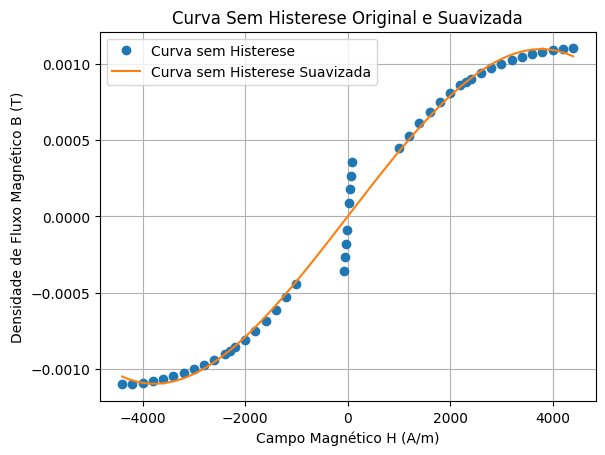

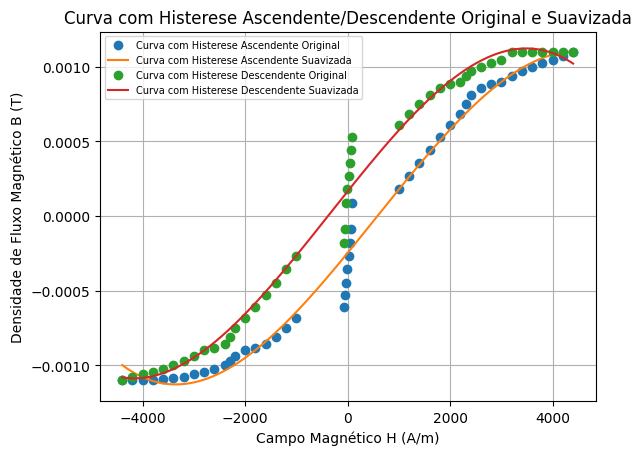

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Carregar dados do arquivo Excel
mag_curve_data = pd.read_excel('CurvaMag_cHisterese.xlsx')

# Supondo que o arquivo contém colunas 'H' e 'B', 'A', 'D', 'Z'
H = mag_curve_data['H'].values
B = mag_curve_data['B'].values
A = mag_curve_data['A'].values
D = mag_curve_data['D'].values

# Verificar e remover valores infinitos ou NaN sem hiterese
finite_mask = np.isfinite(H) & np.isfinite(B)
H = H[finite_mask]
B = B[finite_mask]

# Verificar e remover valores infinitos ou NaN ascendente
finite_mask = np.isfinite(H) & np.isfinite(A)
H = H[finite_mask]
A = A[finite_mask]

# Verificar e remover valores infinitos ou NaN descendente
finite_mask = np.isfinite(H) & np.isfinite(D)
H = H[finite_mask]
D = D[finite_mask]

# Criar a interpolação univariada para suavização sem histerese
spline = UnivariateSpline(H, B, s=1)
H_smooth = np.linspace(H.min(), H.max(), 500)  # Valores de H suavizados
B_smooth = spline(H_smooth)

# Criar a interpolação univariada para suavização ascendente
spline = UnivariateSpline(H, A, s=1)
H_smooth = np.linspace(H.min(), H.max(), 500)  # Valores de H suavizados
A_smooth = spline(H_smooth)

# Criar a interpolação univariada para suavização descendente
spline = UnivariateSpline(H, D, s=1)
H_smooth = np.linspace(H.min(), H.max(), 500)  # Valores de z suavizados
D_smooth = spline(H_smooth)

# Plotar a curva Sem Histerese original e a suavizada
plt.figure()
plt.plot(H, B, 'o', label='Curva sem Histerese')  # Dados originais
plt.plot(H_smooth, B_smooth, label='Curva sem Histerese Suavizada')  # Dados suavizados
plt.xlabel('Campo Magnético H (A/m)')
plt.ylabel('Densidade de Fluxo Magnético B (T)')
plt.title('Curva Sem Histerese Original e Suavizada')
plt.grid(True)
plt.legend()
plt.show()


# Plotar a curva com Histerese Ascendente original e a suavizada
plt.figure()
plt.plot(H, A, 'o', label='Curva com Histerese Ascendente Original')  # Dados originais
plt.plot(H_smooth, A_smooth, label='Curva com Histerese Ascendente Suavizada')  # Dados suavizados
plt.plot(H, D, 'o', label='Curva com Histerese Descendente Original')  # Dados originais
plt.plot(H_smooth, D_smooth, label='Curva com Histerese Descendente Suavizada')  # Dados suavizados
plt.xlabel('Campo Magnético H (A/m)')
plt.ylabel('Densidade de Fluxo Magnético B (T)')
plt.title('Curva com Histerese Ascendente/Descendente Original e Suavizada')
plt.grid(True)
plt.legend(fontsize=7)
plt.show()

### Calcular e plotar corrente de magnetização
#t = np.arange(0, 340e-3, 1/3000)  # Tempo de 0 a 340 ms com passo de 1/3000 s
#I_m = B_max * np.sin(2 * np.pi * f * t)  # Corrente de magnetização

#plt.figure()
#plt.plot(t, I_m)
#plt.xlabel('Tempo (s)')
#plt.ylabel('Corrente de Magnetização (A)')
#plt.title('Corrente de Magnetização x Tempo')
#plt.grid(True)
#plt.show()



Corrente de Excitação na Curva sem Histerese: -0.00 A


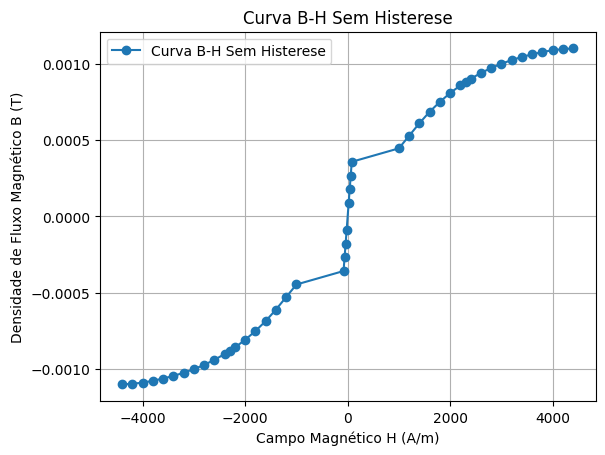

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Carregar dados do arquivo Excel
mag_curve_data = pd.read_excel('MagCurve.xlsx')

# Supondo que o arquivo contém colunas 'H' e 'B'
H = mag_curve_data['H'].values
B = mag_curve_data['B'].values

# Verificar e remover valores infinitos ou NaN
finite_mask = np.isfinite(H) & np.isfinite(B)
H = H[finite_mask]
B = B[finite_mask]

# Calcular a área da seção transversal do enrolamento (hipotético, pode ser um valor fixo para exemplo)
A = 0.001  # área em metros quadrados

# Frequência da fonte senoidal
f = 50  # frequência em Hz
omega = 2 * np.pi * f  # frequência angular

# Calcular a tensão induzida e a corrente de excitação
e_t = omega * np.trapz(B * A, H)  # tensão induzida (considerando integral para simplificar)
N = 1000  # número de espiras do enrolamento (hipotético, pode ser um valor fixo para exemplo)
i_phi = e_t / (omega * N)  # corrente de excitação

print(f"Corrente de Excitação na Curva sem Histerese: {i_phi:.2f} A")

# Plotar a curva de B-H
plt.figure()
plt.plot(H, B, 'o-', label='Curva B-H Sem Histerese')
plt.xlabel('Campo Magnético H (A/m)')
plt.ylabel('Densidade de Fluxo Magnético B (T)')
plt.title('Curva B-H Sem Histerese')
plt.grid(True)
plt.legend()
plt.show()


Corrente de Excitação para Histerese Ascendente: -0.00 A
Corrente de Excitação para Histerese Descendente: 0.00 A


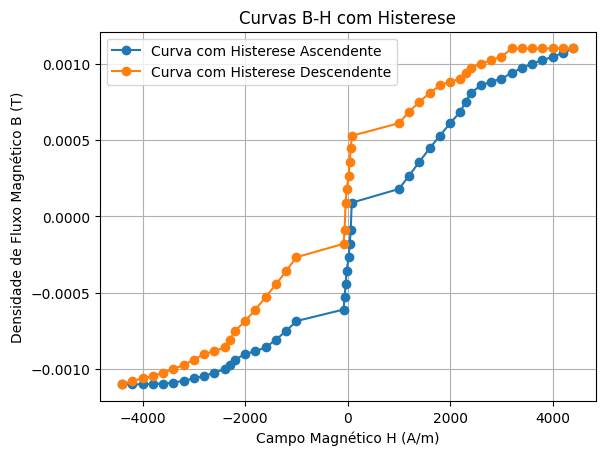

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Carregar dados do arquivo Excel
mag_curve_data = pd.read_excel('MagCurve.xlsx')

# Supondo que o arquivo contém colunas 'H', 'A' (ascendente) e 'D' (descendente)
H = mag_curve_data['H'].values
A = mag_curve_data['A'].values
D = mag_curve_data['D'].values

# Verificar e remover valores infinitos ou NaN
finite_mask_A = np.isfinite(H) & np.isfinite(A)
H_A = H[finite_mask_A]
A = A[finite_mask_A]

finite_mask_D = np.isfinite(H) & np.isfinite(D)
H_D = H[finite_mask_D]
D = D[finite_mask_D]

# Calcular a área da seção transversal do enrolamento (hipotético, pode ser um valor fixo para exemplo)
A_section = 0.001  # área em metros quadrados

# Frequência da fonte senoidal
f = 50  # frequência em Hz
omega = 2 * np.pi * f  # frequência angular

# Função para calcular o fluxo magnético Phi(t)
def calculate_flux(H, B, A_section):
    return np.trapz(B * A_section, H)

# Calcular a tensão induzida e a corrente de excitação para histerese ascendente
Phi_A = calculate_flux(H_A, A, A_section)
e_t_A = omega * Phi_A
N = 1000  # número de espiras do enrolamento (hipotético, pode ser um valor fixo para exemplo)
i_phi_A = e_t_A / (omega * N)  # corrente de excitação para histerese ascendente


# Calcular a tensão induzida e a corrente de excitação para histerese descendente
Phi_D = calculate_flux(H_D, D, A_section)
e_t_D = omega * Phi_D
i_phi_D = e_t_D / (omega * N)  # corrente de excitação para histerese descendente


# Plotar as curvas B-H com histerese ascendente e descendente
plt.figure()
plt.plot(H_A, A, 'o-', label='Curva com Histerese Ascendente')
plt.plot(H_D, D, 'o-', label='Curva com Histerese Descendente')
plt.xlabel('Campo Magnético H (A/m)')
plt.ylabel('Densidade de Fluxo Magnético B (T)')
plt.title('Curvas B-H com Histerese')
plt.grid(True)
plt.legend()
plt.show()


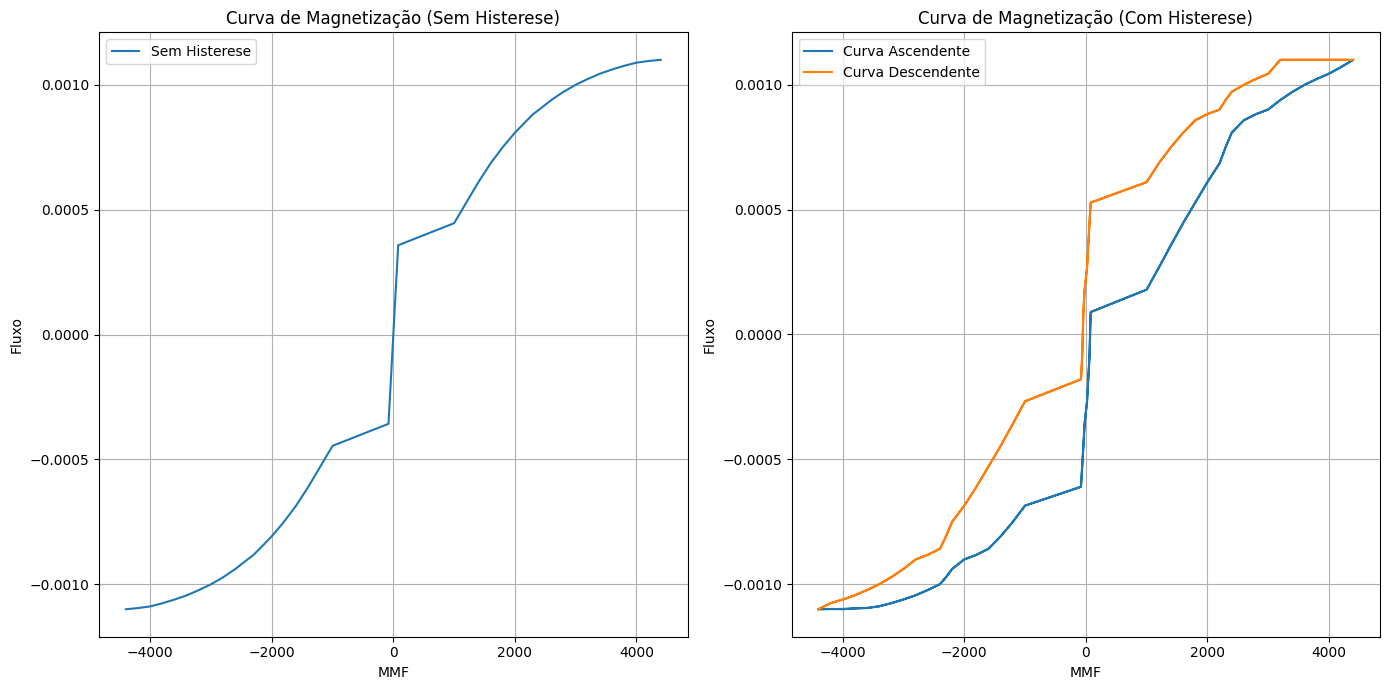

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar a planilha
file_path = '/content/CurvaMag_cHisterese.xlsx'
spreadsheet = pd.ExcelFile(file_path)

# Carregar os dados da folha "Planilha1"
df = pd.read_excel(file_path, sheet_name='Planilha1')

# Extrair dados sem histerese
df_sem_histerese = df.iloc[2:, 0:2]
df_sem_histerese.columns = ['MMF', 'Fluxo']
df_sem_histerese = df_sem_histerese.dropna()
df_sem_histerese['MMF'] = df_sem_histerese['MMF'].astype(float)
df_sem_histerese['Fluxo'] = df_sem_histerese['Fluxo'].astype(float)

# Extrair dados com histerese
df_com_histerese_asc = df.iloc[2:, 3:5]
df_com_histerese_desc = df.iloc[2:, 5:7]
df_com_histerese_asc.columns = ['MMF Asc', 'Fluxo Asc']
df_com_histerese_desc.columns = ['MMF Desc', 'Fluxo Desc']
df_com_histerese_asc = df_com_histerese_asc.dropna()
df_com_histerese_desc = df_com_histerese_desc.dropna()
df_com_histerese_asc['MMF Asc'] = df_com_histerese_asc['MMF Asc'].astype(float)
df_com_histerese_asc['Fluxo Asc'] = df_com_histerese_asc['Fluxo Asc'].astype(float)
df_com_histerese_desc['MMF Desc'] = df_com_histerese_desc['MMF Desc'].astype(float)
df_com_histerese_desc['Fluxo Desc'] = df_com_histerese_desc['Fluxo Desc'].astype(float)

# Plotar as curvas
plt.figure(figsize=(14, 7))

# Curva sem histerese
plt.subplot(1, 2, 1)
plt.plot(df_sem_histerese['MMF'], df_sem_histerese['Fluxo'], label='Sem Histerese')
plt.title('Curva de Magnetização (Sem Histerese)')
plt.xlabel('MMF')
plt.ylabel('Fluxo')
plt.legend()
plt.grid(True)

# Curva com histerese
plt.subplot(1, 2, 2)
plt.plot(df_com_histerese_asc['MMF Asc'], df_com_histerese_asc['Fluxo Asc'], label='Curva Ascendente')
plt.plot(df_com_histerese_desc['MMF Desc'], df_com_histerese_desc['Fluxo Desc'], label='Curva Descendente')
plt.title('Curva de Magnetização (Com Histerese)')
plt.xlabel('MMF')
plt.ylabel('Fluxo')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


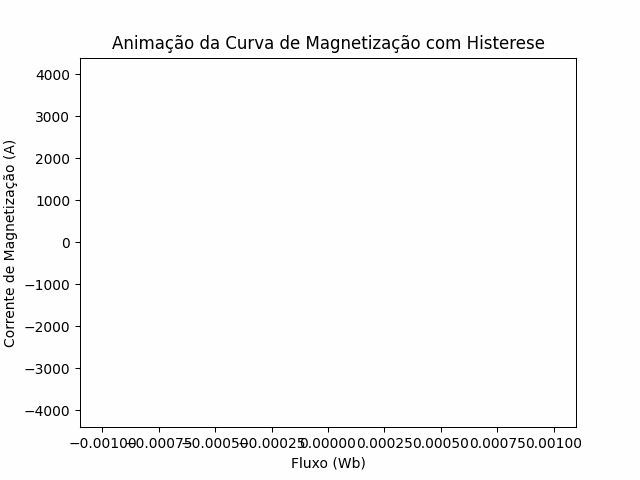

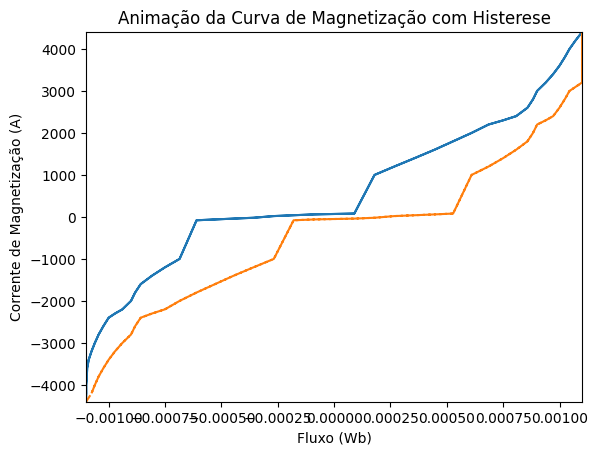

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation, PillowWriter

# Carregar dados da planilha
file_path = '/content/CurvaMag_cHisterese.xlsx'  # Atualize o caminho conforme necessário
df = pd.read_excel(file_path)

# Extração dos dados
# Curva Ascendente
mmf_ascendente = df.iloc[2:, 3].astype(float).values
fluxo_ascendente = df.iloc[2:, 4].astype(float).values

# Curva Descendente
mmf_descendente = df.iloc[2:, 5].astype(float).values
fluxo_descendente = df.iloc[2:, 6].astype(float).values

# Configuração da figura e do eixo
fig, ax = plt.subplots()
ax.set_xlim(fluxo_ascendente.min(), fluxo_ascendente.max())
ax.set_ylim(mmf_ascendente.min(), mmf_ascendente.max())
ax.set_xlabel('Fluxo (Wb)')
ax.set_ylabel('Corrente de Magnetização (A)')
ax.set_title('Animação da Curva de Magnetização com Histerese')

line_asc, = ax.plot([], [], label='Curva Ascendente')
line_desc, = ax.plot([], [], label='Curva Descendente', linestyle='--')

# Função de inicialização
def init():
    line_asc.set_data([], [])
    line_desc.set_data([], [])
    return line_asc, line_desc

# Função de animação
def animate(i):
    if i < len(mmf_ascendente):
        line_asc.set_data(fluxo_ascendente[:i], mmf_ascendente[:i])
    else:
        j = i - len(mmf_ascendente)
        line_desc.set_data(fluxo_descendente[:j], mmf_descendente[:j])
    return line_asc, line_desc

# Criação da animação
ani = FuncAnimation(fig, animate, init_func=init, frames=len(mmf_ascendente) + len(mmf_descendente), interval=50, blit=True)

# Salvar a animação como GIF
ani.save('/content/animacao_histerese.gif', writer=PillowWriter(fps=20))

# Exibir a animação no Google Colab
from IPython.display import Image
Image(filename='/content/animacao_histerese.gif')
